In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')


#Преобразования датасета

In [ ]:
Crucible_currency = pd.read_csv('Crucible.currency.csv', delimiter=';')

print(Crucible_currency)

unique_counts = Crucible_currency.nunique()
print(unique_counts)

Crucible_currency.isnull().sum()

         League        Date            Get             Pay     Value  \
0      Crucible  2023-04-07  Chromatic Orb       Chaos Orb   0.20000   
1      Crucible  2023-04-08  Chromatic Orb       Chaos Orb   0.08333   
2      Crucible  2023-04-09  Chromatic Orb       Chaos Orb   0.15789   
3      Crucible  2023-04-10  Chromatic Orb       Chaos Orb   0.16667   
4      Crucible  2023-04-11  Chromatic Orb       Chaos Orb   0.16667   
...         ...         ...            ...             ...       ...   
42923  Crucible  2023-08-10      Chaos Orb  Engineer's Orb  20.00000   
42924  Crucible  2023-08-11      Chaos Orb  Engineer's Orb  20.00000   
42925  Crucible  2023-08-12      Chaos Orb  Engineer's Orb  20.00000   
42926  Crucible  2023-08-13      Chaos Orb  Engineer's Orb  20.00000   
42927  Crucible  2023-08-14      Chaos Orb  Engineer's Orb  20.00000   

      Confidence  
0           High  
1           High  
2           High  
3           High  
4           High  
...          ...  
42

League        0
Date          0
Get           0
Pay           0
Value         0
Confidence    0
dtype: int64

In [ ]:
# Загружаем исходный датасет
Crucible_currency_Days = Crucible_currency

# Преобразуем столбец с датами в объект datetime
Crucible_currency_Days['Date'] = pd.to_datetime(Crucible_currency_Days['Date'])

# Создайём новый столбец, который будет содержать количество дней, начиная с первой строки
Crucible_currency_Days['Days from start'] = (Crucible_currency_Days['Date'] - Crucible_currency_Days['Date'].iloc[0]).dt.days

Crucible_currency_Days = Crucible_currency_Days.drop(columns=['Date'])
print(Crucible_currency_Days)
unique_counts = Crucible_currency_Days.nunique()
print(unique_counts)
Crucible_currency_Days.isnull().sum()

         League            Get             Pay     Value Confidence  \
0      Crucible  Chromatic Orb       Chaos Orb   0.20000       High   
1      Crucible  Chromatic Orb       Chaos Orb   0.08333       High   
2      Crucible  Chromatic Orb       Chaos Orb   0.15789       High   
3      Crucible  Chromatic Orb       Chaos Orb   0.16667       High   
4      Crucible  Chromatic Orb       Chaos Orb   0.16667       High   
...         ...            ...             ...       ...        ...   
42923  Crucible      Chaos Orb  Engineer's Orb  20.00000        Low   
42924  Crucible      Chaos Orb  Engineer's Orb  20.00000        Low   
42925  Crucible      Chaos Orb  Engineer's Orb  20.00000        Low   
42926  Crucible      Chaos Orb  Engineer's Orb  20.00000        Low   
42927  Crucible      Chaos Orb  Engineer's Orb  20.00000        Low   

       Days from start  
0                    0  
1                    1  
2                    2  
3                    3  
4                    4

League             0
Get                0
Pay                0
Value              0
Confidence         0
Days from start    0
dtype: int64

In [ ]:
#Список релевантной валюты для исследования
value_to_match = ['Chaos Orb', 'Divine Orb', 'Exalted Orb', 'Chromatic Orb', 'Orb of Fusing',
                  'Orb of Alchemy', 'Orb of Alteration', "Jeweller's Orb", 'Orb of Chance',
                  'Orb of Regret', 'Orb of Scouring', 'Vaal Orb','Blessed Orb',
                  "Gemcutter's Prism",'Regal Orb','Orb of Annulment',
                  'Awakened Sextant','Orb of Unmaking','Mirror of Kalandra']
# Фильтрация данных
Basic_Crucible_currency_Days = Crucible_currency_Days[Crucible_currency_Days.apply
 (lambda row: (row['Get'] in value_to_match) and (row['Pay'] in value_to_match), axis=1)]

# Вывод отфильтрованных строк
print(Basic_Crucible_currency_Days)
Basic_Crucible_currency_Days.to_csv('Basic_Crucible_currency_Days.csv', index=False)
print("Столбец с количеством дней создан и датасет сохранен на диске.")
#Проверяем состав данных
unique_counts = Basic_Crucible_currency_Days.nunique()
print(unique_counts)
Basic_Crucible_currency_Days.isnull().sum()

         League            Get               Pay    Value Confidence  \
0      Crucible  Chromatic Orb         Chaos Orb  0.20000       High   
1      Crucible  Chromatic Orb         Chaos Orb  0.08333       High   
2      Crucible  Chromatic Orb         Chaos Orb  0.15789       High   
3      Crucible  Chromatic Orb         Chaos Orb  0.16667       High   
4      Crucible  Chromatic Orb         Chaos Orb  0.16667       High   
...         ...            ...               ...      ...        ...   
42822  Crucible      Chaos Orb  Orb of Annulment  0.14815        Low   
42823  Crucible      Chaos Orb  Orb of Annulment  0.14815        Low   
42824  Crucible      Chaos Orb  Orb of Annulment  0.14815        Low   
42825  Crucible      Chaos Orb  Orb of Annulment  0.12912        Low   
42826  Crucible      Chaos Orb  Orb of Annulment  0.12907        Low   

       Days from start  
0                    0  
1                    1  
2                    2  
3                    3  
4         

League             0
Get                0
Pay                0
Value              0
Confidence         0
Days from start    0
dtype: int64

In [ ]:
#Функция для создания датасэта для выбранной отдельной валюты
def Currency_merge (*item):
  curr_name = item
  # Фильтрация, оставление данных только по 2 выбранным предметам
  df = Basic_Crucible_currency_Days[Basic_Crucible_currency_Days.apply(lambda row: (row['Get'] in curr_name) and (row['Pay'] in curr_name), axis=1)]
  #Разъединяем датасет на два по признаку покупки/продажи
  key_for_data = 'Chaos Orb'
  Pay_for_data = df[df['Pay'] == key_for_data]
  Get_from_data = df[df['Get'] == key_for_data]
  #Меняем названия столбцов для удобства слияния
  Pay_for_data = Pay_for_data.rename(columns={'Value' : 'Pay value'})
  Get_from_data = Get_from_data.rename(columns={'Value' : 'Get value'})
  #Избавляемся от лишних столбцов
  Pay_for_data = Pay_for_data.drop(columns=['Pay','Get','Confidence'])
  Get_from_data = Get_from_data.drop(columns=['Pay','Get','Confidence'])
  #Слияние датасэтов
  Pay_for_data = Pay_for_data.reset_index(drop=True)
  Get_from_data = Get_from_data.reset_index(drop=True)

  df2 = pd.concat([Pay_for_data, Get_from_data], axis=1)

  # Приведение значения покупки к единицам в Chaos Orb как стандартному эквиваленту для удобства
  import math

  df2['Get value'] = df2['Get value'].apply(lambda x: round((1 / x), 2))
  #Полученное значение для сопоставления с имеющимся округляем до сотых
  df2 = df2.T.drop_duplicates().T
  #Удаляем задвоенные столбцы
  return df2

In [ ]:
#создание необходимого датасэта для валюты, подставить название валюты
datta = Currency_merge('Chaos Orb','Awakened Sextant')
datta = datta.rename(columns={'Pay value' : 'Sextant buy'})
datta = datta.rename(columns={'Get value' : 'Sextant sell'})
datta.to_csv('Sextant_Crucible_Days_merged.csv', index=False)
print(datta)

       League Sextant buy Days from start Sextant sell
0    Crucible         2.0               1         1.07
1    Crucible         0.8               2         0.88
2    Crucible         1.5               3          1.8
3    Crucible         1.5               4          2.0
4    Crucible        1.79               5         2.34
..        ...         ...             ...          ...
125  Crucible     2.80084             126         4.31
126  Crucible     2.87018             127         5.18
127  Crucible     2.94418             128          5.5
128  Crucible     2.92945             129         5.33
129  Crucible      2.8371             130         5.42

[130 rows x 4 columns]


In [ ]:
#Зчитываем созданные нами датасэты
Blessed_Crucible_Days_merged = pd.read_csv('Blessed_Crucible_Days_merged.csv')
Chromatic_Crucible_Days_merged = pd.read_csv('Chromatic_Crucible_Days_merged.csv')
Divine_Crucible_Days_merged = pd.read_csv('Divine_Crucible_Days_merged.csv')
Exalted_Crucible_Days_merged = pd.read_csv('Exalted_Crucible_Days_merged.csv')
Fusing_Crucible_Days_merged = pd.read_csv('Fusing_Crucible_Days_merged.csv')
Jeweller_Crucible_Days_merged = pd.read_csv('Jeweller_Crucible_Days_merged.csv')
Mirror_Crucible_Days_merged = pd.read_csv('Mirror_Crucible_Days_merged.csv')
Scouring_Crucible_Days_merged = pd.read_csv('Scouring_Crucible_Days_merged.csv')
Sextant_Crucible_Days_merged = pd.read_csv('Sextant_Crucible_Days_merged.csv')

In [ ]:
print (Blessed_Crucible_Days_merged)

       League  Blessed buy  Days from start  Blessed sell
0    Crucible      1.00000                0          0.16
1    Crucible      0.36000                1          0.34
2    Crucible      0.66667                2          0.40
3    Crucible      0.73897                3          0.50
4    Crucible      0.71429                4          0.51
..        ...          ...              ...           ...
126  Crucible      0.33333              126          0.10
127  Crucible      0.33333              127          0.10
128  Crucible      0.33333              128          0.10
129  Crucible      0.33333              129          0.11
130  Crucible      0.33333              130           NaN

[131 rows x 4 columns]


In [ ]:
#Понадобившаяся дообработка
Mirror_Crucible_Days_merged = Mirror_Crucible_Days_merged.drop(columns=['Days from start'])
Sextant_Crucible_Days_merged = Sextant_Crucible_Days_merged.drop(columns=['Days from start'])
Scouring_Crucible_Days_merged = Scouring_Crucible_Days_merged.drop(columns=['Days from start','League.1','Days from start.1' ])
Blessed_Crucible_Days_merged = Blessed_Crucible_Days_merged.drop(columns=['League.1','Days from start.1' ])

In [ ]:
print(Fusing_Crucible_Days_merged)

       League  Fusing buy  Days from start  Fusing sell
0    Crucible     1.00000                0         0.14
1    Crucible     0.16667                1         0.15
2    Crucible     0.21203                2         0.22
3    Crucible     0.28571                3         0.30
4    Crucible     0.33333                4         0.32
..        ...         ...              ...          ...
126  Crucible     0.22650              126         0.26
127  Crucible     0.23760              127         0.26
128  Crucible     0.21518              128         0.27
129  Crucible     0.20895              129         0.27
130  Crucible     0.20349              130         0.28

[131 rows x 4 columns]


In [ ]:
#Слияние отдельных датасэтов для каждой валюты воедино
Basic_Crusible_currency_merged = pd.concat([ Divine_Crucible_Days_merged, Sextant_Crucible_Days_merged,
                                            Exalted_Crucible_Days_merged, Scouring_Crucible_Days_merged,
                                            Fusing_Crucible_Days_merged, Jeweller_Crucible_Days_merged,
                                            Chromatic_Crucible_Days_merged,Mirror_Crucible_Days_merged,
                                            Blessed_Crucible_Days_merged ], axis=1)
#Заполнение пропусков предыдущим значением
Basic_Crusible_currency_merged = Basic_Crusible_currency_merged.fillna(method='ffill')
#Приведение к однообразию стобцов отсчёта дней, чтобы удалить дубликаты
Basic_Crusible_currency_merged['Days from start'] = Basic_Crusible_currency_merged['Days from start'].astype(int)
#Удаление задублированных после слияния столбцов
Basic_Crusible_currency_merged = Basic_Crusible_currency_merged.T.drop_duplicates().T

print(Basic_Crusible_currency_merged)

In [ ]:
Basic_Crusible_currency_merged.to_csv('Basic_Crusible_currency_merged.csv', index=False)

In [ ]:
Basic_Crusible_currency_merged = pd.read_csv('Basic_Crusible_currency_merged.csv')

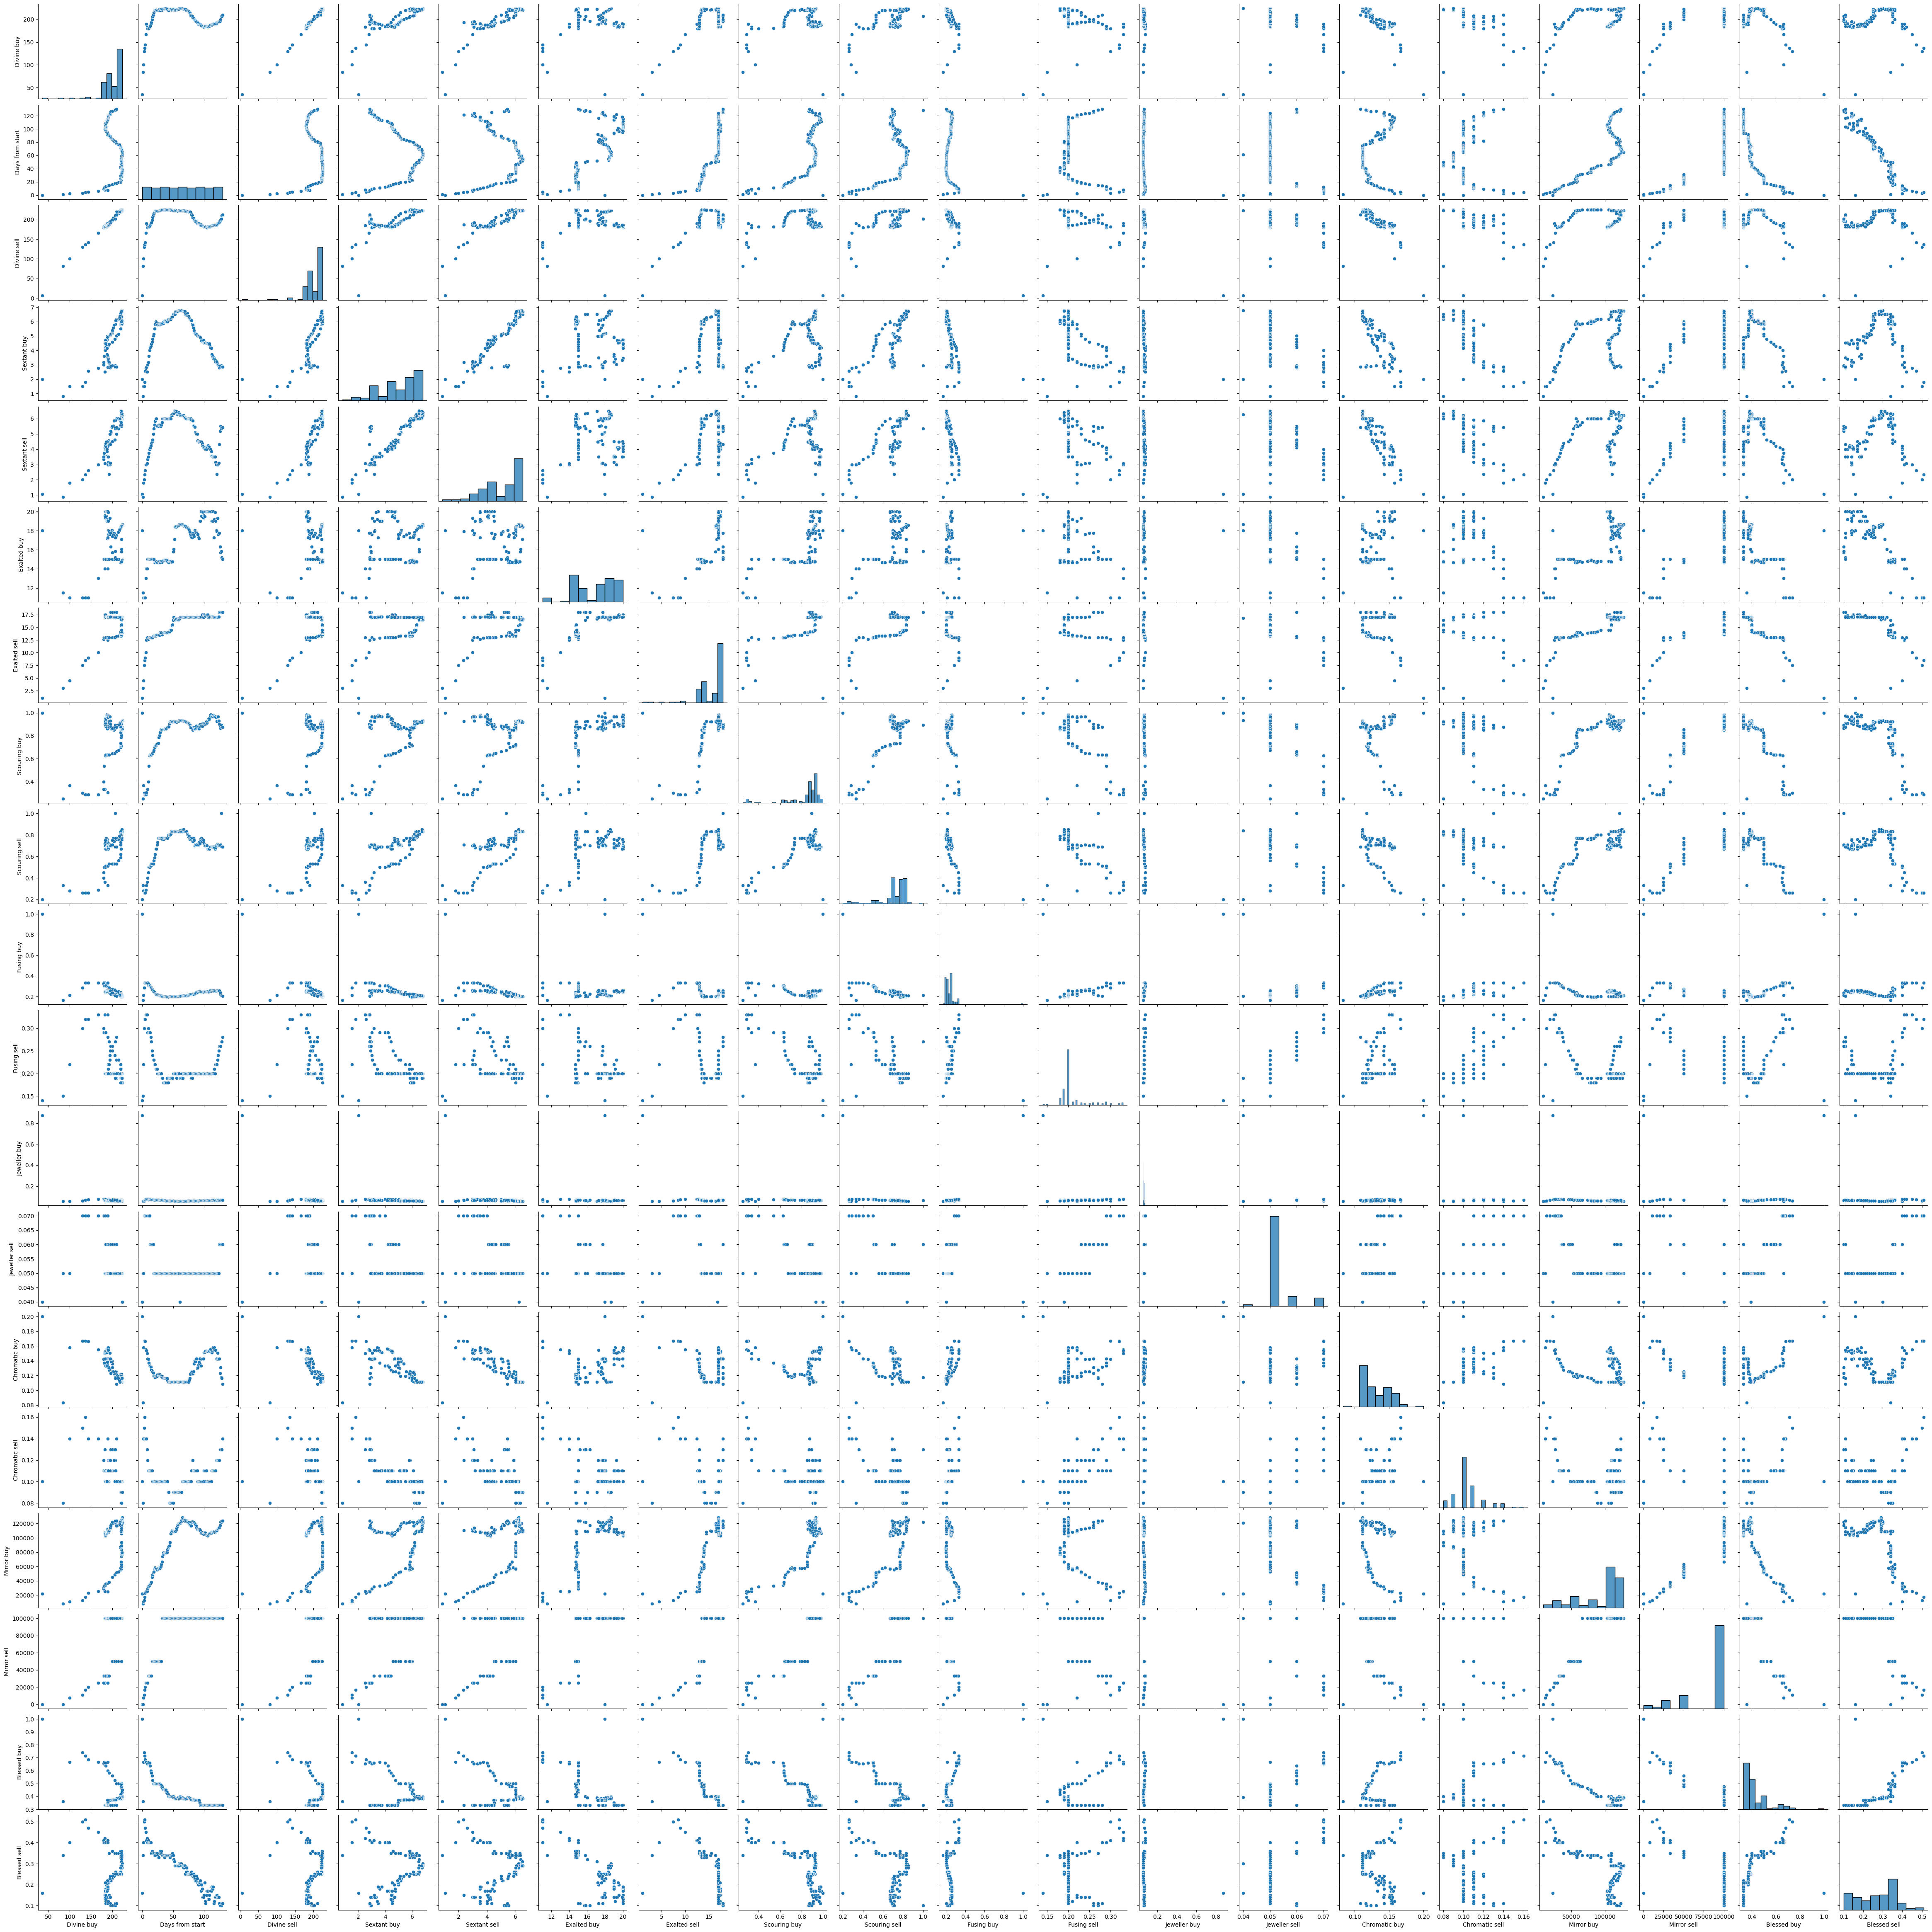

In [ ]:
sns.pairplot(Basic_Crusible_currency_merged)

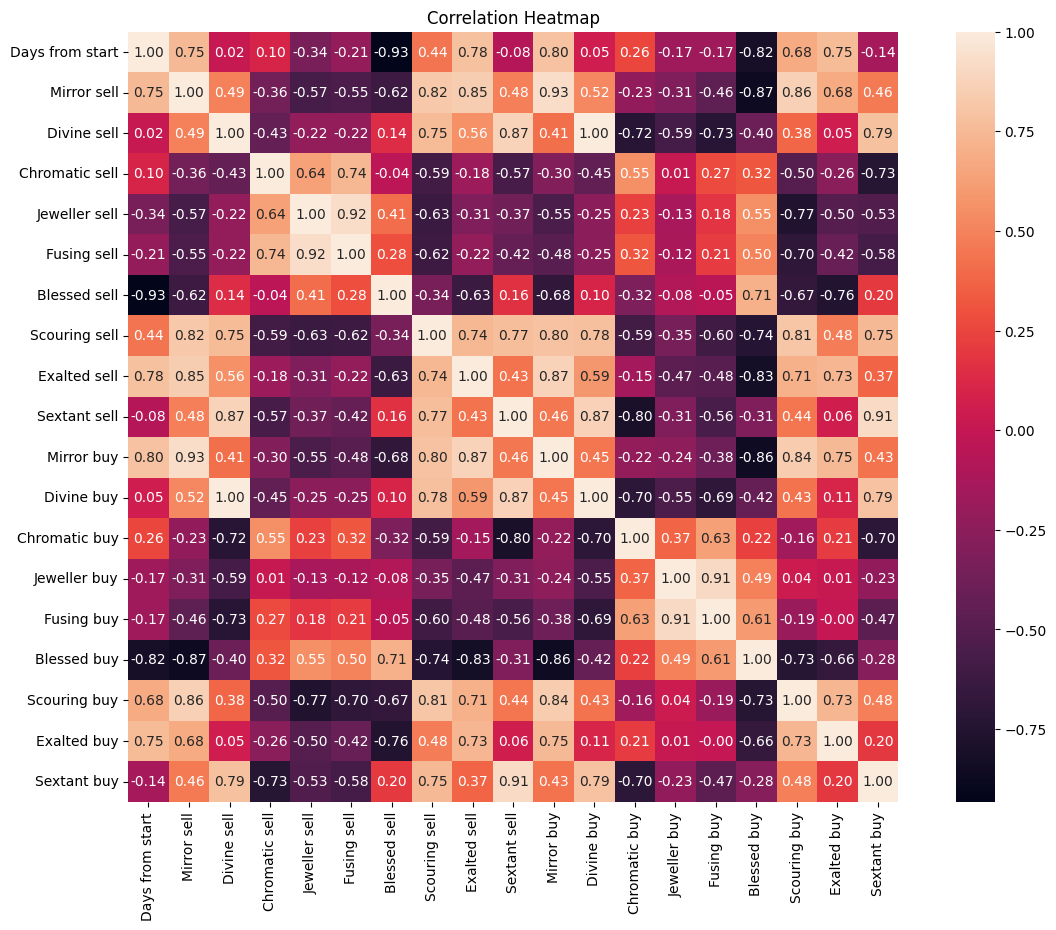

In [ ]:
#Для упрощения выбора переменных отобразим таблицу корреляций

#-----------------------------------------

columns_to_correlate3 = ['Days from start', 'Mirror sell', 'Divine sell',
                        'Chromatic sell', 'Jeweller sell','Fusing sell',
                        'Blessed sell','Scouring sell', 'Exalted sell',
                        'Sextant sell', 'Mirror buy', 'Divine buy',
                        'Chromatic buy', 'Jeweller buy','Fusing buy',
                        'Blessed buy','Scouring buy', 'Exalted buy',
                        'Sextant buy']

correlation_matrix3 = Basic_Crusible_currency_merged[columns_to_correlate3].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix3, annot=True,  fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()

## Если значение по модулю равняется 0.6 и выше, можно сказать, что данные хорошо коррелируют

# Метрики для исследования

Коэффициент детерминации (R-квадрат) для заданного набора истинных значений (y_true) и предсказанных значений (y_pred). Принимает значения от 0 до 1, более высокое значение означает лучшее соответствие модели данным

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2}{\sum_{i=1}^{n} (y_{\text{true},i} - \bar{y}_{\text{true}})^2}$$


In [ ]:
def r2_score(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    r2 = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
    return round(r2, 3)


Скорректированный коэффициент детерминации (R-квадрат). Учитывает количество
предикторов (признаков) в модели и предостерегает от переобучения.

$$ R^2_{\text{adj}} = 1 - \left(1 - R^2\right) \times \frac{n - 1}{n - k - 1}$$

In [ ]:
def adj_r2score(y_true, y_pred, n, k):
 r2 = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
 adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
 return round(adjusted_r2, 3)

Akaike Information Criterion - статистический критерий, используемый для сравнения статистических моделей. AIC позволяет оценить качество модели с учетом баланса между точностью подгонки данных (правдоподобием) и сложностью модели. Чем меньше значение - тем больше точность

$$\text{AIC} = 2k - 2\ln(L)$$

In [ ]:
def aic(y_true, y_pred, k):
    mse = np.mean((y_true - y_pred) ** 2)
    pravdob = 1 / np.sqrt(2 * np.pi * mse) * np.exp(-0.5 * (y_true - y_pred) ** 2 / mse)
    aic = 2 * k - 2 * np.sum(np.log(pravdob))
    return round(aic, 3)

Corrected Akaike Information Criterion - скорректированный критерий Акаике, учитывает размер выборки при оценке качества модели. Является вариантом AIC, в котором внесена коррекция для выборок малого размера.Чем меньше значение AICC, тем лучше модель

$$\text{AICC} = \text{AIC} + \frac{2k(k + 1)}{n - k - 1}$$

In [ ]:
def aicc(aic, k, n):
    aicc = aic + 2 * k * (k + 1) / (n - k - 1)
    return round(aicc, 3)

Bayesian Information Criterion (или критерий Шварца). BIC используется для оценки качества модели с учетом баланса между точностью подгонки данных и сложностью модели, наказывает модели за большее количество параметров сильнее, чем AIC

$$\text{BIC} = k\ln(n) - 2\ln(L)$$

In [ ]:
def bic(y_true, y_pred, k, n):
    mse = np.mean((y_true - y_pred) ** 2)
    pravdob = 1 / np.sqrt(2 * np.pi * mse) * np.exp(-0.5 * (y_true - y_pred) ** 2 / mse)
    bic = -2 * np.sum(np.log(pravdob)) + k * np.log(n)
    return round(bic, 3)

MSE (Mean Squared Error) - измеряет среднеквадратичную разницу между прогнозами модели и фактическими наблюдениями. Чем меньше значение MSE, тем лучше модель соответствует данным. Не всегда интуитивно понятна, так как измеряется в квадратных единицах

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2$$

In [ ]:
def mse_s(y_true, y_pred):
    return round(np.mean((y_true - y_pred) ** 2), 3)

RMSE является более интерпретируемой метрикой по сравнению с MSE, так как она измеряется в тех же единицах, что и зависимая переменная, и позволяет легче сравнивать ошибки модели с исходными данными и оценить точность модели с учетом разброса между фактическими значениями и прогнозами модели

$$\text{RMSE} = \sqrt{\text{MSE}}$$

In [ ]:
def rmse_s(y_true, y_pred):
    return round(np.sqrt(mse_s(y_true, y_pred)), 3)

MAE (Mean Absolute Error) - измеряет среднее абсолютное отклонение между фактическими значениями и прогнозами модели. Измеряется в тех же единицах, что и зависимая переменная, представляет собой среднее значение абсолютных отклонений модели от исходных данных. Чем меньше значение MAE, тем лучше модель соответствует данным

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{true},i} - y_{\text{pred},i}|$$

In [ ]:
def mae_s(y_true, y_pred):
    return round(np.mean(np.abs(y_true - y_pred)), 3)

MAPE (Mean Absolute Percentage Error) - измеряет среднюю абсолютную процентную ошибку между фактическими значениями и прогнозами модели,позволяет оценить среднюю относительную точность модели, часто используется в задачах прогнозирования, когда необходимо оценить точность прогнозов в относительных величинах, например, в финансовых и экономических задачах.Чем меньше значение MAPE, тем точнее модель в среднем предсказывает фактические значения

$$\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left|\frac{y_{\text{true},i} - y_{\text{pred},i}}{y_{\text{true},i}}\right| \times 100\%$$

In [ ]:
def mape_s(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 3)

SMAPE (Symmetric Mean Absolute Percentage Error) - SMAPE измеряет симметричную среднюю абсолютную процентную ошибку между фактическими значениями и прогнозами модели, учитывает как завышенные, так и заниженные прогнозы, позволяет оценить симметричную точность модели в отношении фактических значений

$$\text{SMAPE} = \frac{1}{n} \sum_{i=1}^{n} \frac{2 |y_{\text{true},i} - y_{\text{pred},i}|}{(|y_{\text{true},i}| + |y_{\text{pred},i}|)} \times 100\%$$

In [ ]:
def smape_s(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return round(np.mean(diff) * 100, 3)

WAPE (Weighted Absolute Percentage Error) - измеряет взвешенную абсолютную процентную ошибку между фактическими значениями и прогнозами модели. Веса могут быть применены к различным наблюдениям в зависимости от их важности, WAPE измеряется в процентах и является абсолютной процентной ошибкой, взвешенной по весам.

$$\text{WAPE} = \frac{\sum_{i=1}^{n} w_i|y_{\text{true},i} - y_{\text{pred},i}|}{\sum_{i=1}^{n} w_i|y_{\text{true},i}|} \times 100\%$$

In [ ]:
def wape_s(y_true, y_pred, weights):
    return round(np.sum(np.abs(y_true - y_pred) * weights) / np.sum(np.abs(y_true) * weights) * 100, 2)

Accuracy (Точность) - используемая для оценки качества модели в задачах классификации. Она измеряет долю правильных предсказаний, сделанных моделью, относительно общего числа наблюдений. Accuracy измеряется в интервале от 0 до 1, где 1 означает 100% точности. Может быть неинформативной в случаях, когда классы в данных несбалансированы

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

In [ ]:
def accuracy_s(tp,tn,fp,fn):
    return round((tp+tn)/(tp+tn+fp+fn),2)

$$\text{Precision} = \frac{TP}{TP + FP}$$

In [ ]:
def precision_s(tp,fp):
    return round(tp/(tp+fp),2)

$$\text{Recall} = \frac{TP}{TP + FN}$$

In [ ]:
def recall_s(tp,fn):
    return round(tp/(tp+fn),2)

$$\text{F1-Score} = 2 \times \left( \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \right)$$

In [ ]:
def f1_score(tp,tn,fp,fn):
    p = precision(tp,fp)
    r = recall(tp,fn)
    return round(2*(p*r)/(p+r),2)

#Реализация метрик

In [ ]:
Basic_Crusible_currency_merged = pd.read_csv('Basic_Crusible_currency_merged.csv')

# Демонстрация примеров различных соотношений для AUC-ROC

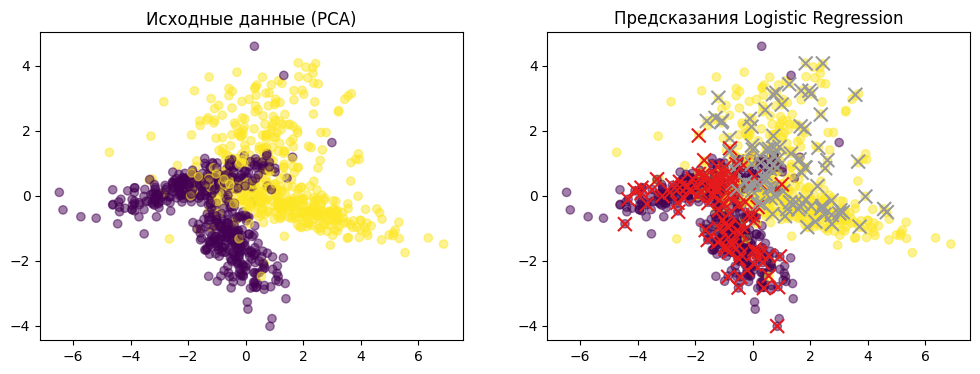

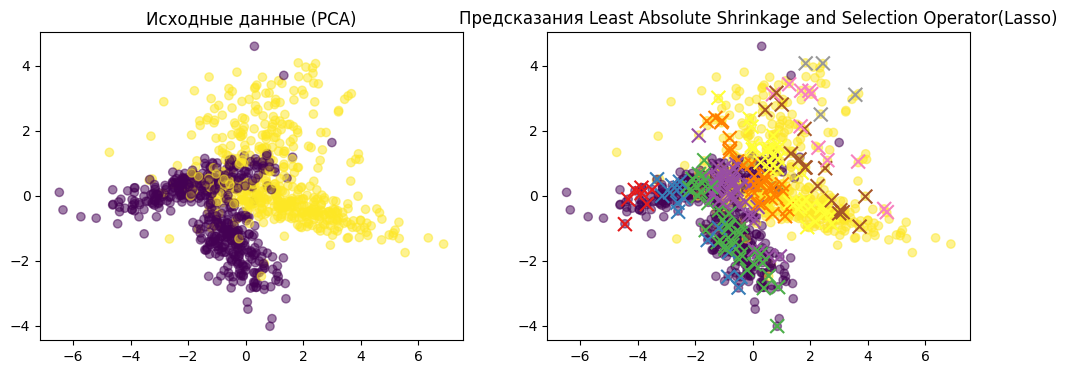

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso
# Создадим синтетические данные для демонстрации
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Визуализируем синтетические данные
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('Исходные данные (PCA)')

# Обучим две модели с разными характеристиками
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# Визуализация предсказаний модели Logistic Regression
X_pred_lr = model1.predict(X_test)
X_pca_pred_lr = pca.transform(X_test)

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.scatter(X_pca_pred_lr[:, 0], X_pca_pred_lr[:, 1], c=X_pred_lr, cmap='Set1', marker='x', s=100)
plt.title('Предсказания Logistic Regression')

plt.show()

model2 = Lasso(alpha=0.5)
model2.fit(X_train, y_train)
# Визуализация предсказаний модели Least Absolute Shrinkage and Selection Operator
X_pred_rf = model2.predict(X_test)
X_pca_pred_rf = pca.transform(X_test)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('Исходные данные (PCA)')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.scatter(X_pca_pred_rf[:, 0], X_pca_pred_rf[:, 1], c=X_pred_rf, cmap='Set1', marker='x', s=100)
plt.title('Предсказания Least Absolute Shrinkage and Selection Operator(Lasso)')

plt.show()

# Получим вероятности принадлежности к классу "1" для каждой модели
y_prob1 = model1.predict_proba(X_test)[:, 1]
y_prob2 = np.random.uniform(0, 0.5, len(y_test))
# Рассчитаем ROC-кривые и площади под ними (AUC)
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, _ = roc_curve(y_test, y_prob2)
roc_auc2 = auc(fpr2, tpr2)

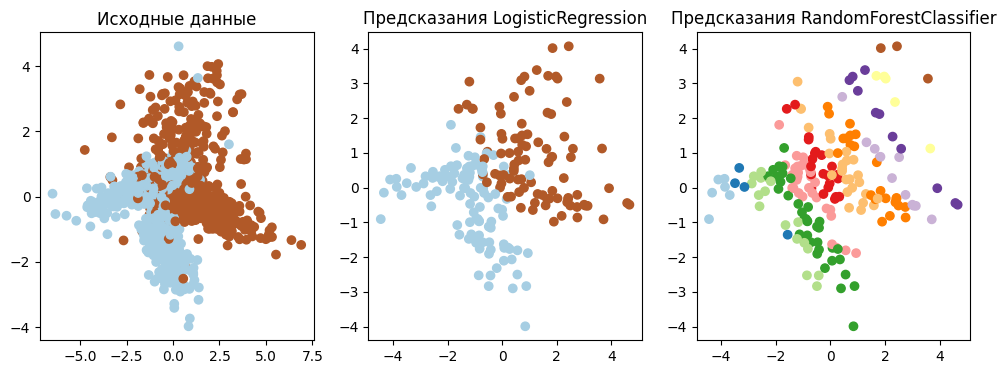

In [ ]:
# Визуализация исходных данных
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Исходные данные")

# Визуализация данных, предсказанных моделью LogisticRegression
y_pred1 = model1.predict(X_test)
X_test_reduced = pca.transform(X_test)

plt.subplot(132)
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_pred1, cmap=plt.cm.Paired)
plt.title("Предсказания LogisticRegression")

# Визуализация данных, предсказанных моделью RandomForestClassifier
y_pred2 = model2.predict(X_test)

plt.subplot(133)
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_pred2, cmap=plt.cm.Paired)
plt.title("Предсказания RandomForestClassifier")

plt.show()

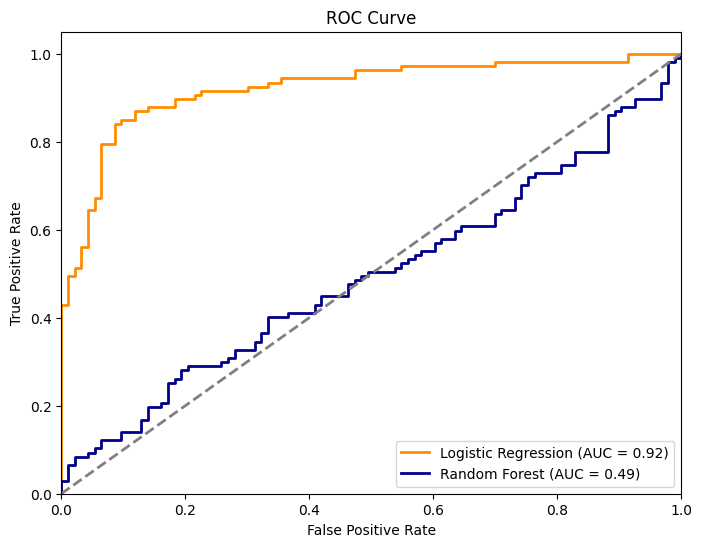

In [ ]:
# Получим вероятности принадлежности к классу "1" для каждой модели
y_prob1 = model1.predict_proba(X_test)[:, 1]
y_prob2 = np.random.uniform(0, 0.5, len(y_test))
# Рассчитаем ROC-кривые и площади под ними (AUC)
fpr1, tpr1, _ = roc_curve(y_test, y_prob1)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, _ = roc_curve(y_test, y_prob2)
roc_auc2 = auc(fpr2, tpr2)


# Визуализируем ROC-кривые
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='darkblue', lw=2, label=f'Random Forest (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

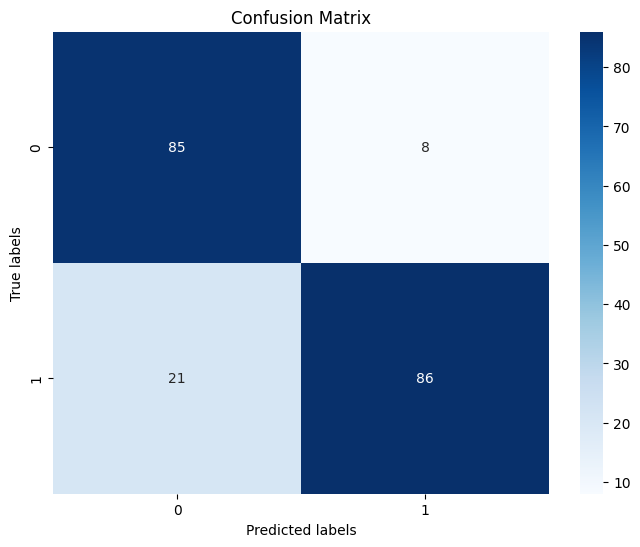

Accuracy: 0.85
Precision: 0.91
Recall: 0.80
F1-Score: 0.86


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Предсказание меток на тестовом наборе данных
y_pred = model1.predict(X_test)

# Создание матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


На основе полученных данных можно сделать вывод, что модель имеет хорошую способность правильно классифицировать отрицательные примеры (высокое значение TN) и положительные примеры (высокое значение TP). Однако существует небольшое количество ошибок, так как есть и False Positive  и False Negative

# Метод SVR (Опорно-векторная регрессия)

## SVR с линейным ядром

In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = Basic_Crusible_currency_merged[['Days from start']]
y = Basic_Crusible_currency_merged['Divine buy']

# Создайте и настройте модель SVR
model = SVR(kernel='linear', C=100, epsilon=1, gamma='scale')
model.fit(X_train, y_train)

# Предскажите значения на тестовом наборе
y_pred = model.predict(X)

# Визуализируйте результаты
plt.scatter(X, y, color='darkorange', label='Actual')
plt.plot(X, y_pred, color='navy', lw=2, label='Predicted')
plt.legend()
plt.title('SVR с линейным ядром')
plt.show()

met_znach = {
    'Значение': [r2_score(y, y_pred),
                 adj_r2score(y, y_pred,n,k),
                 aic(y, y_pred, k),
                 aicc(aic(y, y_pred, k), k, n),
                 bic(y, y_pred, k, n),
                 mse_s(y, y_pred),
                 rmse_s(y, y_pred),
                 mae_s(y, y_pred),
                 mape_s(y, y_pred),
                 smape_s(y, y_pred)],
    'Метрика': ['R2 score', 'Adjusted R-squared', 'AIC', 'AICC','BIC',
               'MSE','RMSE','MAE','MAPE %','SMAPE %']
}

met_znach = pd.DataFrame(met_znach)

met_znach


## SVM с RBF ядром

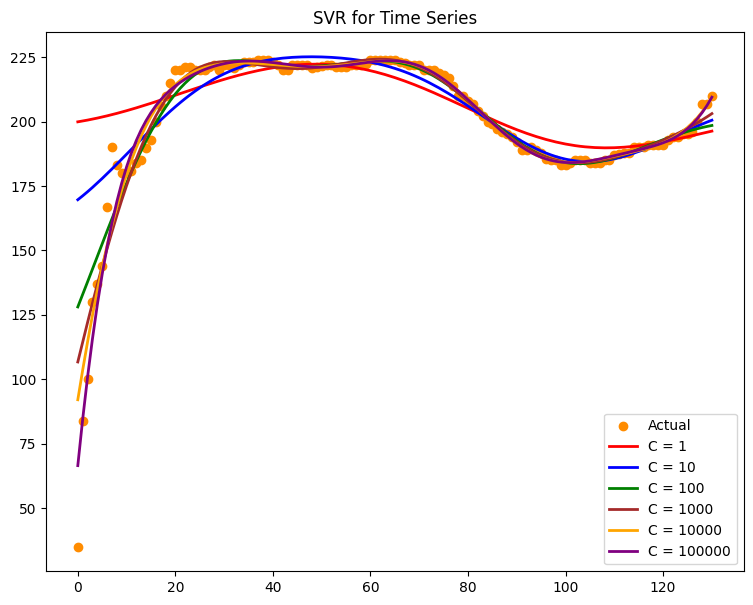

NameError: ignored

In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = Basic_Crusible_currency_merged[['Days from start']]
y = Basic_Crusible_currency_merged['Divine buy']

# Создайте и настройте модель SVR

model0 = SVR(kernel='rbf', C=1, epsilon=0.5, gamma='scale')
model0.fit(X, y)

model1 = SVR(kernel='rbf', C=10, epsilon=0.5, gamma='scale')
model1.fit(X, y)

model2 = SVR(kernel='rbf', C=100, epsilon=0.5, gamma='scale')
model2.fit(X, y)

model3 = SVR(kernel='rbf', C=1000, epsilon=0.5, gamma='scale')
model3.fit(X, y)

model4 = SVR(kernel='rbf', C=10000, epsilon=0.5, gamma='scale')
model4.fit(X, y)

model5 = SVR(kernel='rbf', C=100000, epsilon=0.5, gamma='scale')
model5.fit(X, y)

# Предскажите значения на тестовом наборе
y_pred0 = model0.predict(X)
y_pred1 = model1.predict(X)
y_pred2 = model2.predict(X)
y_pred3 = model3.predict(X)
y_pred4 = model4.predict(X)
y_pred5 = model5.predict(X)

# Визуализируйте результаты

plt.figure(figsize=(9, 7))
plt.scatter(X, y, color='darkorange', label='Actual')
plt.plot(X, y_pred0, color='red', lw=2, label='C = 1')
plt.plot(X, y_pred1, color='blue', lw=2, label='C = 10')
plt.plot(X, y_pred2, color='green', lw=2, label='C = 100')
plt.plot(X, y_pred3, color='brown', lw=2, label='C = 1000')
plt.plot(X, y_pred4, color='orange', lw=2, label='C = 10000')
plt.plot(X, y_pred5, color='purple', lw=2, label='C = 100000')
plt.legend()
plt.title('SVR for Time Series')
plt.show()

met_znach = {
    'При c=1': [r2_score(y, y_pred0),
                 adj_r2score(y, y_pred0,n,k),
                 aic(y, y_pred0, k),
                 aicc(aic(y, y_pred6, k), k, n),
                 bic(y, y_pred0, k, n),
                 mse_s(y, y_pred0),
                 rmse_s(y, y_pred0),
                 mae_s(y, y_pred0),
                 mape_s(y, y_pred0),
                 smape_s(y, y_pred0)],
    'При c=10': [r2_score(y, y_pred1),
                 adj_r2score(y, y_pred1,n,k),
                 aic(y, y_pred1, k),
                 aicc(aic(y, y_pred1, k), k, n),
                 bic(y, y_pred1, k, n),
                 mse_s(y, y_pred1),
                 rmse_s(y, y_pred1),
                 mae_s(y, y_pred1),
                 mape_s(y, y_pred1),
                 smape_s(y, y_pred1)],
    'При c=100': [r2_score(y, y_pred2),
                 adj_r2score(y, y_pred2,n,k),
                 aic(y, y_pred2, k),
                 aicc(aic(y, y_pred2, k), k, n),
                 bic(y, y_pred2, k, n),
                 mse_s(y, y_pred2),
                 rmse_s(y, y_pred2),
                 mae_s(y, y_pred2),
                 mape_s(y, y_pred2),
                 smape_s(y, y_pred2)],
    'При c=1000': [r2_score(y, y_pred3),
                 adj_r2score(y, y_pred3,n,k),
                 aic(y, y_pred3, k),
                 aicc(aic(y, y_pred3, k), k, n),
                 bic(y, y_pred3, k, n),
                 mse_s(y, y_pred3),
                 rmse_s(y, y_pred3),
                 mae_s(y, y_pred3),
                 mape_s(y, y_pred3),
                 smape_s(y, y_pred3)],
    'При c=10000': [r2_score(y, y_pred4),
                 adj_r2score(y, y_pred4,n,k),
                 aic(y, y_pred4, k),
                 aicc(aic(y, y_pred4, k), k, n),
                 bic(y, y_pred4, k, n),
                 mse_s(y, y_pred4),
                 rmse_s(y, y_pred4),
                 mae_s(y, y_pred4),
                 mape_s(y, y_pred4),
                 smape_s(y, y_pred4)],
    'При c=100000': [r2_score(y, y_pred5),
                 adj_r2score(y, y_pred5,n,k),
                 aic(y, y_pred5, k),
                 aicc(aic(y, y_pred5, k), k, n),
                 bic(y, y_pred5, k, n),
                 mse_s(y, y_pred5),
                 rmse_s(y, y_pred5),
                 mae_s(y, y_pred5),
                 mape_s(y, y_pred5),
                 smape_s(y, y_pred5)],
    'Метрика': ['R2 score', 'Adjusted R-squared', 'AIC', 'AICC','BIC',
               'MSE','RMSE','MAE','MAPE %','SMAPE %']
}

met_znach = pd.DataFrame(met_znach)

met_znach


## SVM с POLY ядром

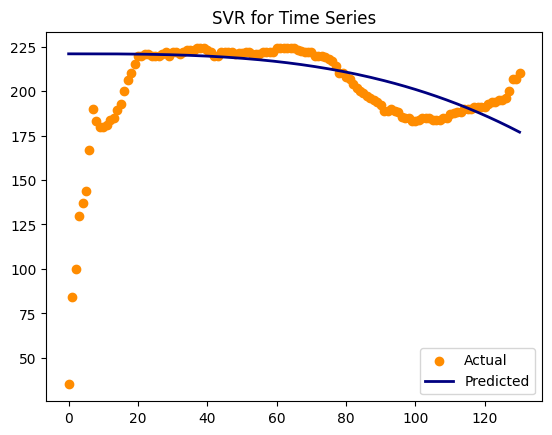

,Значение,Метрика
0,-0.164102,R2 score
1,-0.211000,Adjusted R-squared
2,1262.241000,AIC
3,1262.401000,AICC
4,1263.537000,BIC
5,882.081000,MSE
6,29.700000,RMSE
7,14.886000,MAE
8,12.570000,MAPE %
9,8.209000,SMAPE %


In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = Basic_Crusible_currency_merged[['Days from start']]
y = Basic_Crusible_currency_merged['Divine buy']

# Создайте и настройте модель SVR
model = SVR(kernel='poly', epsilon=0.5)
model.fit(X, y)

# Предскажите значения на тестовом наборе
y_pred = model.predict(X)

# Визуализируйте результаты
plt.scatter(X, y, color='darkorange', label='Actual')
plt.plot(X, y_pred, color='navy', lw=2, label='Predicted')
plt.legend()
plt.title('SVR for Time Series')
plt.show()

met_znach = {
    'Значение': [r2_score(y, y_pred),
                 adj_r2score(y, y_pred,n,k),
                 aic(y, y_pred, k),
                 aicc(aic(y, y_pred, k), k, n),
                 bic(y, y_pred, k, n),
                 mse_s(y, y_pred),
                 rmse_s(y, y_pred),
                 mae_s(y, y_pred),
                 mape_s(y, y_pred),
                 smape_s(y, y_pred)],
    'Метрика': ['R2 score', 'Adjusted R-squared', 'AIC', 'AICC','BIC',
               'MSE','RMSE','MAE','MAPE %','SMAPE %']
}

met_znach = pd.DataFrame(met_znach)

met_znach

In [ ]:
print(Basic_Crusible_currency_merged)

# Оценка качества заполнения пропусков в пользовательских данных с использованием метрик

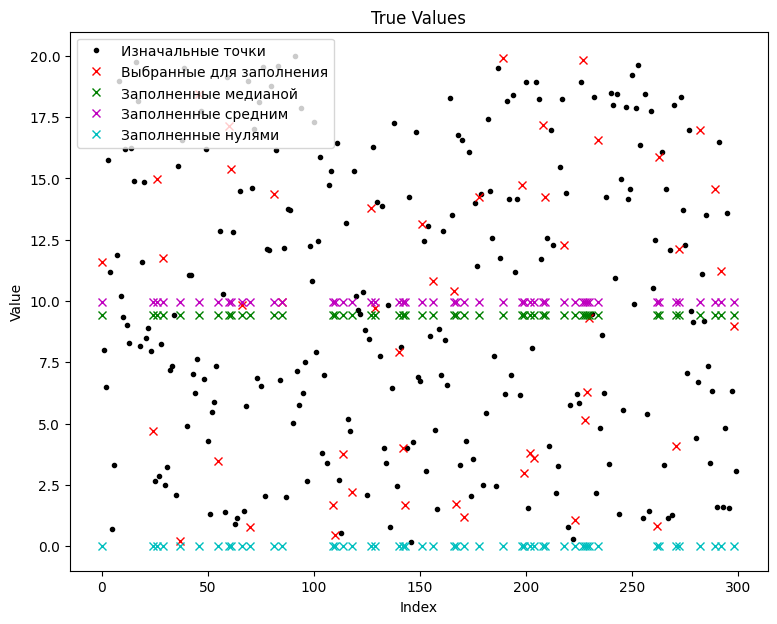

,Метод заполнения,MSE,RMSE,MAE,MAPE
0,Медиана,5.986,2.447,0.878,45.938
1,Среднее,6.067,2.463,0.874,48.352
2,Нули,20.145,4.488,1.537,16.667


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Создаем случайный датасет с 100 строками и одним столбцом
random.seed(5)
data = 20*np.random.rand(300)
data_with_nans = data.copy()
true_data = data.copy()
# Создаем случайные пропуски
random_indices = np.random.choice(range(len(data)), size=50, replace=False)
replaced_indices = random_indices
data_with_nans[replaced_indices] = np.nan

# Создаем DataFrame
df = pd.DataFrame(data_with_nans)
true_values = pd.DataFrame(data)
Values_for_fill = pd.Series(data)

# Заполняемые значения
filled_true_values = Values_for_fill.loc[replaced_indices]
# Заполняем пропуски медианой
filled_median = df.fillna(df.median())
filled_median_values = filled_median.iloc[replaced_indices]
#Заполняем пропуски средним
filled_mean = df.fillna(df.mean())
filled_mean_values = filled_mean.iloc[replaced_indices]
# Заполнение нулями
filled_with_zeros = df.fillna(0)
filled_with_zeros_values = filled_with_zeros.iloc[replaced_indices]
# Визуализация изначального массива
plt.figure(figsize=(9, 7))
plt.plot(data_with_nans, 'k.', label='Изначальные точки')
plt.plot(filled_true_values, 'rx', label='Выбранные для заполнения')
plt.plot(filled_median_values, 'xg', label='Заполненные медианой')
plt.plot(filled_mean_values, 'xm', label='Заполненные средним')
plt.plot(filled_with_zeros_values, 'xc', label='Заполненные нулями')
plt.title('True Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Оцениваем заполнение медианой
mse_median = mse_s(true_values, filled_median)
mae_median = mae_s(true_values, filled_median)
rmse_median = rmse_s(true_values, filled_median)
mape_median = mape_s(true_values, filled_median)

# Оцениваем заполнение средним
mse_mean = mse_s(true_values, filled_mean)
mae_mean = mae_s(true_values, filled_mean)
rmse_mean = rmse_s(true_values, filled_mean)
mape_mean = mape_s(true_values, filled_mean)

# Оцениваем заполнение нулями
mse_zeros = mse_s(true_values, filled_with_zeros)
mae_zeros = mae_s(true_values, filled_with_zeros)
rmse_zeros = rmse_s(true_values, filled_with_zeros)
mape_zeros = mape_s(true_values, filled_with_zeros)

results_data = {
    'Метод заполнения': ['Медиана', 'Среднее', 'Нули'],
    'MSE': [float(mse_median), float(mse_mean), float(mse_zeros)],
    'RMSE': [float(rmse_median), float(rmse_mean), float(rmse_zeros)],
    'MAE': [float(mae_median), float(mae_mean), float(mae_zeros)],
    'MAPE': [float(mape_median), float(mape_mean), float(mape_zeros)]
}
results_df = pd.DataFrame(results_data)
results_df


# Реализация метода градиентного бустинга

Метод градиентного бустинга (Gradient Boosting) - это ансамбльное машинное обучение, который используется для задач классификации и регрессии. Он представляет собой алгоритм, который комбинирует несколько слабых моделей (обычно решающих деревьев) в одну сильную модель, путем обучения итеративно с учетом ошибок предыдущей модели.

Основные принципы метода градиентного бустинга:

Создание базовых моделей: Градиентный бустинг начинается с обучения базовых моделей, обычно решающих деревьев. Эти базовые модели называются "слабыми учениками" и могут быть довольно простыми.

Обучение с учетом ошибок: Градиентный бустинг обучается итеративно. На каждой итерации он настраивает новую модель, учитывая ошибки, сделанные предыдущими моделями. Это достигается путем нахождения градиента функции потерь по предсказаниям предыдущей модели.

Взвешивание моделей: Новая модель добавляется к ансамблю с учетом ее важности. Важность модели определяется насколько она способна исправлять ошибки предыдущих моделей.

Ансамбль: В итоге, все базовые модели комбинируются вместе для создания сильной модели. Предсказания каждой модели взвешиваются, и результаты объединяются в окончательное предсказание.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Генерация синтетических данных для примера

np.random.seed(111)
X = np.random.rand(300, 1)
y = 2 * X.squeeze() + np.random.rand(300)

# Определение параметров градиентного бустинга
n_estimators = 100
learning_rate = 0.1

# Инициализация предсказаний
predictions = np.zeros(len(X))

# Создание списка моделей
models = []

# Обучение градиентного бустинга
for i in range(n_estimators):
    # Вычисление остатков
    residuals = y - predictions

    # Обучение базовой модели (решающего дерева) на остатках
    model = DecisionTreeRegressor(max_depth=3)
    model.fit(X, residuals)

    # Добавление модели в список
    models.append(model)

    # Получение предсказаний базовой модели
    tree_predictions = model.predict(X)

    # Обновление предсказаний ансамбля с учетом предсказаний базовой модели
    predictions += learning_rate * tree_predictions

# Для предсказания новых данных используем ансамбль
new_data = np.array([0.5]).reshape(1, -1)
final_prediction = sum(learning_rate * model.predict(new_data) for model in models)
print("Предсказание для новых данных, она же сумма предсказаний всех моделей в ансамбле, взвешенных на коэффициент обучения:", final_prediction)

Предсказание для новых данных, она же сумма предсказаний всех моделей в ансамбле, взвешенных на коэффициент обучения: [1.51008811]


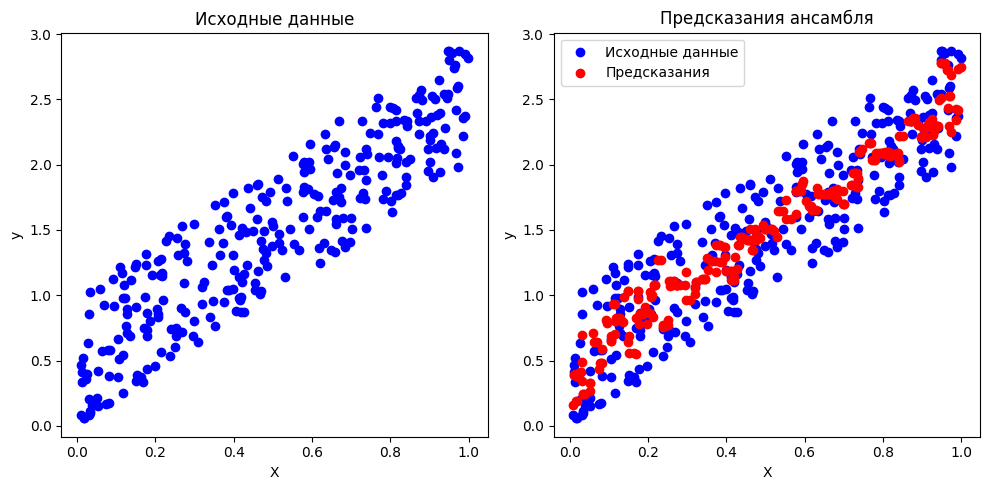

In [ ]:
# Визуализация исходных данных
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, label="Исходные данные", color='b')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Исходные данные")

# Визуализация предсказаний
plt.subplot(1, 2, 2)
plt.scatter(X, y, label="Исходные данные", color='b')
plt.scatter(X, predictions, label="Предсказания", color='r')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Предсказания ансамбля")
plt.legend(loc='best')

plt.tight_layout()
plt.show()